### *“Don't be afraid to start over. This time you're not starting from scratch, you're starting from experience.”*  
### *-Unknown*

---

# Your Names

* XXX
* XXX


# The Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets  #For the preloaded dataset

# The Data Set 

![Iris Types](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*YYiQed4kj_EZ2qfg_imDWA.png)



The feature/predictor variables are all continuous and measured in centimeters:

* sepal_len
* sepal_wid
* petal_len
* petal_wid

The target variable is the class variable:

* Iris setosa: 0
* Iris versicolor: 1
* Iris virginica: 2

**NOTICE THERE ARE 150 ROWS.**

In [2]:
#The dataset can be imported via sklearn (instead of a csv)
#(Some datasets are so popular, they are included in some of 
# the data science modules)

iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Scatterplots

Here's scatterplots that show how each pair of variables relate. Notice:

* There is definitely clustering per species.
* Using sepal length/width alone wouldn’t distinguish between versicolor and virginica
* But with petal width/length thrown into the mix, prediction with KNN seems possible.

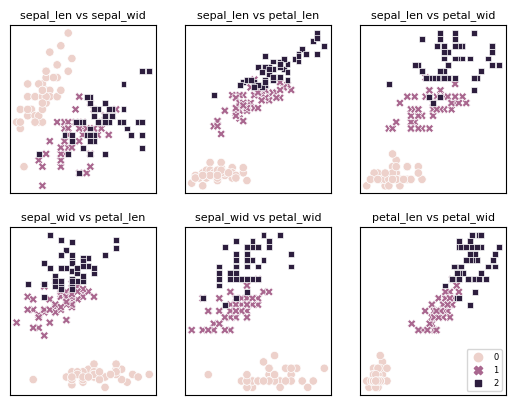

In [3]:
metrics = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
pairs = [(i, j) for i in range(4) for j in range(4) if i < j]
fig, ax = plt.subplots(2, 3)

for row in range(2):
    for col in range(3):
        i, j = pairs[3 * row + col]
        #ax[row][col].get_legend().remove()
        #plt.gca().legend.remove()
        ax[row][col].set_title(f"{metrics[i]} vs {metrics[j]}", fontsize=8)
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
        
        show_legend = False
        if row == 1 and col == 2:
            show_legend = True
            
        sns.scatterplot(ax=ax[row][col], data = iris_df, x = metrics[i], y = metrics[j], hue = 'class', style='class', legend = show_legend)
        
ax[-1][-1].legend(loc='lower right', prop={'size': 6})


# Split according to a testing set and a training set

One of the earliest steps is always to split the data into a test and training set.

We will use the ```train_test_split``` function from sklearn.  If you pass in just one dataframe, it shuffles the dataframe and divides it into 2 smaller datafarmes, a training dataframe and a testing dataframe, according to the given test_size.  

* ```the_training_df, the_test_df = train_test_split(df, test_size=..., random_state=...) ```

Note:

* It is called ```train_test_split``` and not ```test_train_split```.  This is meant to help you remember that the training set is returned before the testing set.

* The ```test_size``` is usually .20 or .25, thus splitting the dataframe into training/testing according to a 20%/80% or 25%/75% breakdown.

* The ```random_state``` parameter is optional.  Today we''ll use a random state of 42.  Then we'll all use the same seed, thus allowing for **REPRODUCIBLE RESULTS**.  In other words, we will all have the same test/train set when we are done dividing our dataset.  This will allow you to compare your results directly to mine.

### DIRECTIONS:

Below, use ```train_test_split``` to split the ```iris_df``` into 2 dataframes called "train_set" and "test_set".  Be sure to use a ```random_state``` of 42.

In [4]:
from sklearn.model_selection import train_test_split  #we have to import this function

... 

Ellipsis

Always check out the train/test sets and their shapes to make sure all went well.

QUESTION BEFORE WE CHECK THEM OUT:  What shoud the size of both sets add to?  Put your answer below.

<font color="red">YOUR ANSWER: xxxx</font>

In [6]:
#Check out the training set
print("Shape of train set:", ...)  #print the shape
train_set #Show the train_set

Shape of train set: Ellipsis


,sepal_len,sepal_wid,petal_len,petal_wid,class
22,4.6,3.6,1.0,0.2,0
15,5.7,4.4,1.5,0.4,0
65,6.7,3.1,4.4,1.4,1
11,4.8,3.4,1.6,0.2,0
42,4.4,3.2,1.3,0.2,0
...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,1
106,4.9,2.5,4.5,1.7,2
14,5.8,4.0,1.2,0.2,0
92,5.8,2.6,4.0,1.2,1


In [8]:
#Check out the Test set
print("Shape of test set:", ...)
test_set #Show the test_set

Shape of test set: Ellipsis


,sepal_len,sepal_wid,petal_len,petal_wid,class
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1
31,5.4,3.4,1.5,0.4,0
64,5.6,2.9,3.6,1.3,1
141,6.9,3.1,5.1,2.3,2
68,6.2,2.2,4.5,1.5,1
82,5.8,2.7,3.9,1.2,1


# The KNN ALGORITHM

To complete the KNN algorithm, we'll create several functions.

### Function: ```get_distance```

As you know, we need a distance for KNN.  We will use the euclidean distance metric and we will create it by hand, because this lab is about coding the algorithm from scratch.

So create a ```get_distance``` function that takes in 2 points.  The TYPES of these 2 points will be dataframes, ie, each of the points will be a single dataframe that contains exactly one row.  And we will need to find the distance between the points.

**Be aware:**

* The class column should NOT be used in the distance calculation.  If you don't know why, call me over.

### DIRECTIONS:  

Read the docstring to understand the parameters and complete the function.

In [10]:
def get_distance(row_with_point1, row_with_point2, cols):
    """
    get_distance(row_with_point1, row_with_point2, cols) returns the euclidean distance
    between the two points.

    Parameters
    ----------
    row_with_point1: a dataframe with a single row representing point 1
    
    row_with_point2: a dataframe with a single row representing point 2
    
    cols:  A list of strings describing the column names to use in the 
           calculation since some columns are not meant to be included 
           in the distance calculation.  
    """

    #Code this up - find the euclidean dist between the 2 given points
    distance = 0
    
    return distance


####################################################
#To test the function, use the below line.
#This should return 4.192851058647326 when done.
#Notice you have to fill in some arguments.
####################################################

get_distance(train_set.iloc[...],  #Pass in the first row/point of the training set   
             test_set.iloc[...],   #Pass in the first row/point of the test set 
             [...])  #Pass in the column names we should use to find the distance 

0

### MORE TEST CASES

Below are two more test cases.

In [ ]:
#Should print 1.3228756555322956
get_distance(...,  #Pass in the first row/point of the training set  
             ...,   #Pass in the second row/point of the testing set  
             [...])  

In [ ]:
#Should be print.2345009313209605
get_distance(...,  #Pass in the last row/point of the training set  
             ...,   #Pass in the last row/point of the testing set  
             [...])  

### Function: ```classify_a_new_point_with_knn```

Now we will create a function whose job is to classify exactly one row/point using training data.

Read the docstring to understand the parameters and complete the function.

In [ ]:
def classify_a_new_point_with_knn(k, train_df, new_point_df, predictor_cols, target_col):
    """
    classify_a_new_point_with_knn(k, train_df, new_point_df, predictor_cols, target_col)
    classifies a new point as 0/1/2 (setosa/versicolor/virginica). 

    PARAMETERS
    ----------
    k:  The value of k to use for k nearest neighbors
    
    train_df: A dataframe holding the training data
    
    new_point_df: The new point to classify. This will be a dataframe with one row.
    
    predictor_cols:  A list of strings describing the column names of the predictor variables.
           
    target_col: The name of the target column, ie, the variable we are trying to predict.

    RETURNS:
    --------
    The class of the point  (so 0, 1, or 2)

    """

    ###################################################################################
    #Step 1 -> Create a column in the train_df that will hold the distance between 
    #a row/point and the new point that we're trying to predict.  We default the values
    #to NaN to start.  I did not use 0 so that it would be easy to see which rows 
    #were not assigned a value, should anything go wrong in development.
    ###################################################################################
    train_df['dist_to_new_point'] = np.NaN 

    ###################################################################################
    #STEP 2:  Generate distances between the training points and the point to classify.
    #For every row_index in the training set:
    #    Figure out the distance between the new point and the current row.
    #    Store this distance in the newly created column.
    #Remember:  This is a learning lab.  
    #           We don't loop over a dataframe row by row traditionally.
    ###################################################################################    
    for row_index in train_df.index:
        ... 

    
    ###################################################################################
    #STEP 3: Now use the nearest k neighbors to classify the new point
    ###################################################################################
    
    ... #Add as many code lines as you need to set the variable below.  
        #It took me 4 lines in total, if that helps to know.
    
    most_freq_class = ...  #Set the final classification
    
    return most_freq_class
 
####################################################
#To test the function, use the below line.
#This should return 1 (versicolor) when done.
#Notice you have to fill in arguments.
####################################################
    
classify_a_new_point_with_knn(...,               #Use 3 neighbors
                              ...,               #What is the training df called?
                              ...,               #Pass in the first row/point of the testing set 
                              [...],             #The predictor column names
                              ...)               #The target column name

### MORE TEST CASES

More test cases are below.

In [ ]:
#should print 0
classify_a_new_point_with_knn(...,               #Use 3 neighbors
                              ...,               #What is the training df called?
                              ...,               #Pass in the second row/point of the testing set 
                              [...],             #The predictor column names
                              ...)               #The target column name

In [ ]:
 #should print 2
classify_a_new_point_with_knn(...,               #Use 3 neighbors
                              ...,               #What is the training df called?
                              ...,               #Pass in the third row/point of the testing set 
                              [...],             #The predictor column names
                              ...)               #The target column name

In [ ]:
 #should print 1
classify_a_new_point_with_knn(...,               #Use 5 neighbors
                              ...,               #What is the training df called?
                              ...,               #Pass in the first row/point of the testing set 
                              [...],             #The predictor column names
                              ...)               #The target column name

### Function: ```classify_all_of_the_test_set_with_knn```

Now we just need to classify ALL of the rows in the testing set to see how we did.

The next function will not return a value.  It will add a column to the test dataframe that contains te predicted class for the given k value.

To know if you are right, here's the first few rows of the test_set when done.

|     | sepal_len | sepal_wid | petal_len | petal_wid | class | prediction_k=3 |
|----:|----------:|----------:|----------:|----------:|------:|---------------:|
|  73 | 6.1       | 2.8       | 4.7       | 1.2       | 1     | 1              |
|  18 | 5.7       | 3.8       | 1.7       | 0.3       | 0     | 0              |
| 118 | 7.7       | 2.6       | 6.9       | 2.3       | 2     | 2              |
|  78 | 6.0       | 2.9       | 4.5       | 1.5       | 1     | 1              |
|  76 | 6.8       | 2.8       | 4.8       | 1.4       | 1     | 1              |
|  31 | 5.4       | 3.4       | 1.5       | 0.4       | 0     | 0              |

In [ ]:
def classify_all_of_the_test_set_with_knn(k, train_df, test_df, predictor_cols, target_col):
    """
    classify_all_of_the_test_set(k, train_df, test_df, predictor_cols, target_col)
    classifies each point in the test_df as 0/1/2 (setosa/versicolor/virginica).
    The result is not returned but stored in a new column of the test_df.
    Example of the new column name: prediction_k=3 

    Parameters
    ----------
    k:  The value of k to use for k nearest neighbors
    
    train_df: A dataframe holding the training data
    
    test_df: A dataframe holding the testing data
    
    predictor_cols:  A list of strings describing the column names of the predictor variables.
           
    target_col: The name of the target column, ie, the variable we are trying to predict.

    """
    ########################################################################
    #STEP 1: Set up a new column in the test dataframe to hold our predictions.
    ########################################################################
    new_column = 'prediction_k=' + str(k)
    test_df[new_column] = np.NAN

    ########################################################################
    #For every row in the testing dataframe:
    #         predict the class and store the prediction in the new column.
    ########################################################################
    for row_index in ....:
        ... #I used one line of code...


In [ ]:
#Let's classify the whole testing set!!  

classify_all_of_the_test_set_with_knn(...,  #Use 3 neighbors
                                      ..., 
                                      ..., 
                                      ..., 
                                      ...) 

test_set #The results are a new column in the test dataset - compare yours against the table shown above.

# VALIDATION

Now we have to be able to evaulate how the KNN model did.

Now create to calculate the accuracy of the KNN algorithm and your predictions.

Note that the way we set this up, the accuracy calculation does not need to know about the training data set, just the test set.

Pass in:
    
* The k value
* A dataframe holding the training data
* The name of the target column


In [ ]:
def get_accuracy(k, test_df, target_col):
    """
    get_accuracy(k, test_df, target_col) computes the accuracy of our results.

    Parameters
    ----------
    k:  The value of k to use for k nearest neighbors
        
    test_df: A dataframe holding the testing data.
             Expected to have a column containing the results for knn run
             with the given k value.  Example: prediction_k=3 
               
    target_col: The name of the target column, ie, the variable we are trying to predict.

    """

    #####################################################################
    #Step one:  recreate the name of the column that has the predictions
    #####################################################################
    predicted_col = 'prediction_k=' + str(k)

    #####################################################################    
    #Step 2: Find the accuracy, ie, the percentage of right classifications
    #####################################################################
    accuracy = ... #Your goal is to set this var.  
                   #Use as many lines of code as you need. I used one.
    
    return accuracy

#Should be 1.0
get_accuracy(3, 
             ..., 
             ...)  

### Confusion Matrices
We can generate a confusion matrix by cross tabulating.  The ```pd.crosstab``` function computes a simple cross tabulation of two (or more) factors.

* ```pd.crosstab(df['A'], df['B'])```
  
Use ```pd.crosstab``` to get a confusion matric now. Your answer should be the table below.

| prediction_k=3 |  0 | 1 |  2 |
|---------------:|---:|--:|---:|
|      class     |    |   |    |
|        0       | 10 | 0 | 0  |
|        1       | 0  | 9 | 0  |
|        2       | 0  | 0 | 11 |

In [ ]:
k=3
predicted_col = 'prediction_k=' + str(k)
...

# Precision, Recall

Precision/Recall involves a binary situation.  But if you were interested in calculating recall/precision for the iris data, then we could just do so for each category (0/1/2).  

For example, to determine precision/receall for the class 1 category, then we would consider a class of 1 to be a positive and 0/2 to be negatives.

Calulate the TP, TN, FP, FN from the confusuon matrix below (```sily_df```) in this scenario.

* **ASSUME THE ROWS ARE ACTUAL VALUES AND THE COLUMNS ARE THE PREDICTED VALUES (since that is consistent with the confusion matrix above).**
* As an example, the 2, 5, 8 row contains all the actual class 1 flowers, but 2 were predicted as class 0, 5 were correctly predicted as class 1, and 8 were predicted as class 2.

In [48]:
#Just run this cell to load in silly_cm
silly_cm = pd.DataFrame({0:[1, 2, 3], 1:[10, 5, 6], 2:[7,8,9]})
silly_cm

,0,1,2
0,1,10,7
1,2,5,8
2,3,6,9


In [ ]:
# Remember:  A 1 is positive.
# Do this without hardcoding any values!!!  
TP = ...
FP = ...
FN = ...
TN = ...

TP, FP, FN, TN  #Should be (5, 16, 10, 36)

### FUNCTION: ```validate_knn```

Now we can create a validate function that returns a dictionary containing:

* The confusion matrix for the model
* The accuracy
* The precision and recall for any categories

Read the documentation on the function and complete it.

The cell after the function definition will help you test your code.

**NOTE:  I originally called this function ```validate``` so if references don't work in your lab ipynb, please use ```validate_knn```.**

In [ ]:
def validate_knn(k, test_df, target_col, prec_recall_categories = []):
    """
    validate(k, test_df, target_col, prec_recall_categories = [])
    returns a dictionary with validation results.

    Parameters
    ----------
    k:  The value of k to use for k nearest neighbors
        
    test_df: A dataframe holding the testing data.
             Expected to have a column containing the results for knn run
             with the given k value.  Example: prediction_k=3 
               
    target_col: The name of the target column, ie, the variable we are trying to predict.

    prec_recall_categories:  A list of the categories to determine the precision of.
            Example: could be [], [1], [0, 1], [0, 2], etc.

    """

    #generate the predicted_col name
    predicted_col = 'prediction_k=' + str(k)
    
    #get the cm
    cm = ...

    #set the accuracy
    acc = ...

    #add the cm and acc values to the results_dictionary
    results_dictionary = {'cm': ..., 
                         'acc': ...}

    #for each of the categories desired, determine the precision and recall
    for cat in prec_recall_categories:

        #Calculate the TP, FP, FN, TN for the given cat (category)
        TP = ...
        FP = ...
        
        FN = ...
        TN = ...

        #Add the precision and recall for the category to the results dataframe
        results_dictionary['precision_' + str(cat)] = ...
        results_dictionary['recall_' + str(cat)] = ...
        
    return results_dictionary  

If your code is working currectly, then the following cell should print:

```
cm prediction_k=3   0  1   2
class                    
0               10  0   0
1                0  9   0
2                0  0  11
*****************************
acc 1.0
*****************************
precision_0 1.0
*****************************
recall_0 1.0
*****************************
precision_1 1.0
*****************************
recall_1 1.0
*****************************
precision_2 1.0
*****************************
recall_2 1.0
*****************************

```

In [ ]:
# Get the validation results for the k=3 run, including precision/recall for all categories
results = validate_knn(..., ..., ..., [0,1,2])

# results is a dictionary, so loop over its keys and use
# the key to print each piece of info in results
for key in results:
    print(key, ...)
    print("*****************************")

----

# More k values!

We only tested for ```k = 3``` above.  Thanks to our helper methods, we can test for other values of ```k``` values very quickly.

Write a for loop that classifies the test data using ```k=1, 3, 5, 7, 9, 11, 13, 15.```

So after your loop, the predictions for 6 valyes of k should be in your test dataframe.

In [ ]:
for k in [1, 3, 5, 7, 9, 11, 13, 15]:
    ...

Now print the results for each of the models built from the different ```k``` values.

Note k=7 should give you this:

```
------------------------k=7---------------------------------
cm prediction_k=7   0  1   2
class                    
0               10  0   0
1                0  8   1
2                0  0  11
*****************************
acc 0.9666666666666667
*****************************
precision_0 1.0
*****************************
recall_0 1.0
*****************************
precision_1 1.0
*****************************
recall_1 0.8888888888888888
*****************************
precision_2 0.9166666666666666
*****************************
recall_2 1.0
*****************************
```

In [ ]:
#Fill in the blanks below to validate each k value.
for k in [1, 3, 5, 7, 9, 11, 13, 15]:

    print(f'------------------------k={k}---------------------------------')
    
    results = validate_knn(..., ...., ..., [0,1,2])

    for key in results:
        print(key, ....)
        print("*****************************")

---

# Follow Up Questions

A) What do you notice in the validation results as the value of k increases from 1 to 15? Mention any patterns you observe.

<font color="red">YOUR ANSWER: xxxx</font>

B) Which k would you recommend to use?

<font color="red">YOUR ANSWER: xxxx</font>

---
Huzzah!  You're done this lab!

Submit!!